
## FINANCIAL ECONOMETRICS
MODULE 1 | LESSON 2

---

# **CORRELATION AND MULTICOLLINEARITY**




|  |  |
|:---|:---|
|**Reading Time** | 60 minutes |
|**Prior Knowledge** | Linear Algebra, Linear Regression  |
|**Keywords** | Covariance and Correlation, Positively correlated variables, Negative correlated variables, Uncorrelated variables,<br> Collinearity & Multicollinearity, Correlation Matrix, Variance Inflation Factor (VIF)   |


---

*In the last lesson, we learned the basic steps to use linear regression models to analyze KO’s stock excess return. We first explained the types of variables in the model and the tools to check variable correlation. We then built a linear regression model and tested the fit of the model by using various metrics and plots*. 

*In this lesson, we are going to explore the relationship among variables in more detail. Specifically, we would like to investigate what would happen to a regression model if the model’s exogenous variables are highly correlated. We will propose some methods to reduce the impact of correlated exogenous variables. We will continue to use KO’s stock excess return project as our example.* 



In [ ]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams["figure.figsize"] = (12, 9)

In [ ]:
# Download the dataset
data_set = pd.read_csv("../fin_data_set.csv")

## **1. Expanding Independent Variables to Study Correlation**

We are going to add more exogenous variables (independent variables) into our *KO* stock excess return model. We selected five stocks to add to the regression model in order to improve our model performance. The five stocks are:

- Google
- Bank of America
- Walmart
- General Electric
- Starbucks

We're following the last lesson’s method to get the quarterly excess returns for the five stocks and then add them to the regression model. Hence, we are expanding our model to include eight variables. Here is the list of the variables:

- Dependent Variable: *KO* quarterly excess return (*KO_Q_EX_R*)
- Independent Variable: *Dow 30* Index quarterly excess return (*Dow_Q_EX_R*)
- Pepsi quarterly excess return (*Pepsi_Q_EX_R*)
- *KO* quarterly revenue return (*REV_Q_R*)
- Google quarterly excess return (*GOOG_Q_R*)
- Bank of America quarterly excess return (*BAC_Q_R*)
- Walmart quarterly excess return (*WMT_Q_R*)
- General Electric quarterly excess return (*GE_Q_R*)
- Starbucks quarterly excess return (*SBUX_Q_R*)

## **2. Covariance and Correlation**

In finance, we are particularly interested in understanding how two variables interact with each other. One popular question is the following: How do two stock returns move together? An answer to this question is provided by the covariance and correlation between two stock returns. **Covariance** is a metric to measure the amount of movement the two variables exhibit. Here is the covariance formula:

$$ \mathrm{Cov} (X,Y) = E [ ( X - E [ X ] ) ( Y - E [ Y ] ) ]$$

- If the covariance has a positive sign, it means the two variables move in the same direction. 
- If the covariance has a negative sign, the two variables move in opposite directions. 
- If the covariance is $0$, the two variables are **linearly uncorrelated (uncorrelated).**

The higher the absolute value of the covariance of the two variables, the stronger the (positive or negative) relationship the two variables have. The downside of covariance is its value changes when the scales of two variables change. Because of this issue, we use correlation more often in data analysis. 

**Correlation** is also a metric to measure the co-movement of the two variables. However, it eliminates the scale issue mentioned above by dividing covariance with the square root of the multiplication of the two variables' variances. Here is the correlation math formula:

$$
\mathrm{Corr} (X,Y) = \frac{ \mathrm{Cov} (X,Y)}{\sqrt{ \mathrm{Var}(X) \mathrm{Var} (Y)}}
$$

- Unlike covariance, the value of correlation is limited between $-1$ and $1$.
- If the correlation of two variables is greater than $0$, the two variables are **positively correlated**.
- If the correlation of two variables is less than $0$, the two variables are **negatively correlated**.
- If two variables are **perfectly positively correlated**, the correlation will be $1$.
- If two variables are **perfectly negative correlated**, the correlation will be $-1$.
- If the correlation is $0$, the two variables are **linearly uncorrelated**.

In Figure 1, we illustrate the relationship of two variables based on their correlation in graphs.

**Figure 1: Correlation Demonstration Graphs**


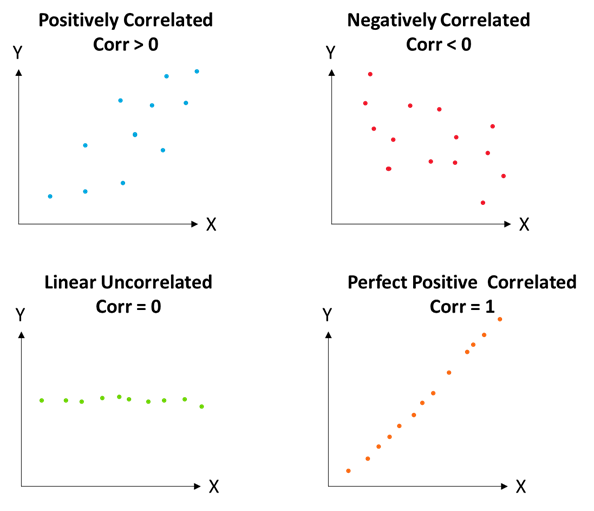

## **3. Collinear Variables**

Most of the financial data we use is collected from various sources and is out of our control in terms of how it is generated. Because we cannot control how financial data is generated, oftentimes, many financial variables move together in systematic ways. Such a problem is called **collinearity** for two variables. We also call the two variables **correlated variables**. If there are more than two variables that are correlated, it is called **multicollinearity**. How can we detect multicollinearity? 

A **correlation matrix** is the best way to investigate multicollinearity. A correlation matrix is an ensemble of the correlations of all variables. Let’s look at our KO stock excess return model to understand the impact of multicollinearity. Figure 2 is the correlation matrix for the dependent variable and independent variables in our model. The correlation of different variables is shown on the upper right triangle of the correlation matrix. The diagonal of the correlation matrix is the correlation for the variable itself, which is always 1. The lower left triangle of the correlation matrix actually provides the same correlation information as the upper right triangle. 

**Figure 2: Correlation Matrix for Dependent Variable and Independent Variables**


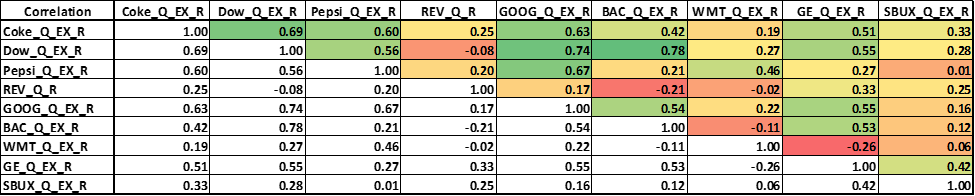

In [ ]:
# Correlation plot of all the variables
data = data_set[
    [
        "Coke_Q_EX_R",
        "Dow_Q_EX_R",
        "Pepsi_Q_EX_R",
        "REV_Q_R",
        "GOOG_Q_EX_R",
        "BAC_Q_EX_R",
        "WMT_Q_EX_R",
        "GE_Q_EX_R",
        "SBUX_Q_EX_R",
    ]
]
c = data.corr()
sns.heatmap(c, annot=True)
plt.show()

Now let's look at the numbers in the correlation matrix. 

### **3.1 Dependent Variable and Independent Variables**

As seen in the matrix, let's examine our dependent variable. *KO*'s excess return is fairly positively correlated with three independent variables: *Dow 30* Index excess return, Pepsi excess return, and Google excess return. Therefore, we can see that these three variables are pretty good at explaining *KO*'s excess return variation.

### **3.2 Low-Correlated Independent Variables**

Now let's turn our focus just on independent variables. First, we'll first look at *KO*'s revenue growth, Walmart excess return and Starbucks' excess return. They are the 3 variables that have low correlation with other independent variables. However, they also have low correlation with our dependent variable: *KO* excess return.

### **3.3 High-Correlated Independent Variables**

In the matrix, the *Dow 30* Index excess return has a high correlation with Google's excess return and Bank of America's excess return. Google's excess return also has a high correlation with Pepsi's excess return. With these four fairly correlated independent variables in our model, will they present any issues to our regression result?

## **4. Impact of Multicollinearity in Regression Model**

1. If independent variables are highly correlated, the variances, standard errors and covariances of the coefficients from the regression model may be large. Then, the estimates of the coefficient will be less precise because the confidence intervals for the coefficient estimates will be wide.
2. The high standard errors for the coefficient estimates also mean the estimates are less likely to be statistically significant. The $R^2$ and adjusted $R^2$ may be high because the whole model is still good. The collinearity issue makes it hard to separate the individual impact from correlated independent variables in the model.
3. Even though it is hard to isolate each variable’s impact in the model, the model can still be a good choice to forecast if the new data from the independent variables have the same collinear issue as the sample data used to build the model.

Let’s run our expanded model and see how the multicollinearity issue influences the model result.

**Figure 3: KO Excess Return Regression Model with Eight Independent Variables**


In [ ]:
# Regression model with 8 independent variables
model_1 = smf.ols(
    "Coke_Q_EX_R ~ Dow_Q_EX_R + Pepsi_Q_EX_R + REV_Q_R + GOOG_Q_EX_R + BAC_Q_EX_R + WMT_Q_EX_R + GE_Q_EX_R + SBUX_Q_EX_R",
    data=data_set,
).fit()
model_1.summary()

In [ ]:
# Parameters with 6 significant digits
model_1.summary2().tables[1]

In the above results, we can see no independent variable estimates are significant (*p-values* are all larger than 0.05). Even the *Dow 30* Index excess return is not significant in this model. This variable was significant in the model in Lesson 1. The $R^2$ is higher in this model (0.633) compared to the $R^2$ in Lesson 1’s model (0.604). This is expected since we have added more independent variables to this model. However, the adjusted $R^2$ in this model (0.407) is significantly lower than the adjusted $R^2$ in the last model (0.538).

## **5. Methods to Address Multicollinearity**

**Method 1:**

This first method to reduce the impact of multicollinearity is to drop independent variables that have high correlation. Usually, the correlation between 0.8 and 0.9 is considered high correlation. You can drop one of the correlated variables from the model and run it again to see if the model improves. The problem with using this method is that it only considers the relationship between two variables one at a time. This method doesn’t address multicollinearity with more than two variables. Sometimes, using correlation alone cannot find this issue.

**Method 2:**

The second method is to treat one of the independent variables in the model as a dependent variable and run a regression with the rest of the independent variables. We can use this method to determine if any of the independent variables can be explained by the other independent variables. Let’s use *KO*'s excess return model as an example. 

Say we make *Dow 30* Index excess return as a dependent variable and run a regression model with the rest of the independent variables. 

**Figure 4: Regression Model to Check Multicollinearity Among Independent Variables**


In [ ]:
# Regression model to check multicollinearity among independent variables
model_dow = smf.ols(
    "Dow_Q_EX_R ~ Pepsi_Q_EX_R + REV_Q_R + GOOG_Q_EX_R + BAC_Q_EX_R + WMT_Q_EX_R + GE_Q_EX_R + SBUX_Q_EX_R",
    data=data_set,
).fit()
model_dow.summary()

In [ ]:
# Parameters with 6 significant digits
model_1.summary2().tables[1]

Figure 4 shows the regression result. We can see from Figure 4 that $R^2$ and adjusted $R^2$ are high. It means that the information of Dow 30 Index excess return can be mostly explained by the rest of the independent variables. In statistics, the **variance inflation factor (VIF)** is used to determine if an independent variable has a multicollinearity issue. The VIF formula for each independent variable is as follows: 

$$ \text{VIF} = \frac{1}{ 1- R^2 } $$

Any software will calculate the VIF for each independent variable. The value of the VIF is from 1 and upward without limit.

- When $R^2$ is 0, the VIF is 1. It means there is no multicollinearity for this independent variable.
- The higher the VIF, the more multicollinearity is present for this independent variable.
- An independent variable with a VIF between 1 and 5 has no severe multicollinearity.
- An independent variable with a VIF that is higher than 5 indicates severe multicollinearity.

For an independent variable that has a high VIF, we can test the model with and without this variable and then check the model result.

Let's show the list of the VIF values of all independent variables.



In [ ]:
labels = [
    "Intercept",
    "Dow_Q_EX_R",
    "Pepsi_Q_EX_R",
    "REV_Q_R",
    "GOOG_Q_EX_R",
    "BAC_Q_EX_R",
    "WMT_Q_EX_R",
    "GE_Q_EX_R",
    "SBUX_Q_EX_R",
]

variables = model_1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

pd.DataFrame(vif[1:], labels[1:], columns=["VIF"])

We can see *Dow 30* Index has a VIF value larger than 5. Since this variable has a severe multicollinearity issue, we need to dig further into this variable and maybe drop it from the model. 



**Method 3:**

The third method we are going to discuss is principal component analysis. Principal component analysis can not only help to mitigate the issue of multicollinearity in a regression but is also an important analytical tool for other financial topics. Because principal component analysis has widespread application in finance, we will spend the next lesson discussing this topic.

## **6. Conclusion**



In this lesson, we introduced covariance and correlation to measure the relationship of two variables. Then, we explained the meaning of collinearity and multicollinearity and how to use a correlation matrix to identify their existence among independent variables in a regression model. The existence of multicollinearity will make coefficient estimates less precise and not statistically significant. We proposed three methods to handle multicollinearity: First, check correlations between each of the independent variables and drop one of the independent variables if the correlation is higher than 0.8. Second, use the VIF metric to test independent variables with a VIF greater than 5. Third, use information from a principal component analysis.

In the next lesson, we will continue our exploration of how to mitigate multicollinearity. Specifically, we will introduce principal component analysis to tackle this issue.



---
Copyright © 2022 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
